## Simple XGBoost tutorial


XGBoost (eXtreme Gradient Boosting) is a machine learning algorithm that uses an ensemble of decision trees and gradient boosting to make predictions.
It is very powerful and scalable, frequently among the best methods you can use in machine learning competitions.

### Brief description
XGBoost relies on ensemble learning via boosting, meaning that its purpose is to combine the predictive power of an arbitrary number of models. The result is one model whose output is an aggregation of the output of all (base) models. The base models can be of the same type or not. 

Bagging and Boosting are common methods to build ensemble learners but they differ in some crucial aspecs.

#### Bagging (bootstrap aggregating)
Decision trees are one of the most easily interpretable models but they exhibit highly variable behavior. To stabilize them a common solution is to combine bootstrap (training a model on a random sample of the data) with the aggregation of the outcome of more models each trainied on a different random sample. An example of bagging method is Random Forest.

#### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners, the final learner is much stronger and brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Having a large number of trees might lead to overfitting.


#### Usefulness of XGBoost
- Very effective
- Supports many tasks: prediction, classification, ranking
- Flexible and able to handle data with a large number of features
- Scalable and [parallelizable](https://www.nvidia.com/en-us/glossary/data-science/xgboost/)


## Example for classification

We will use the trivial **Iris Dataset** which you can get from directly from sklearn or from the UCI repository.

First of all, let's import what is needed:

In [2]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split

from bore.data.tests.test_cf_user_based import urm_train
from bore.data.util import read_train_urm

Load the Iris dataset and split in train and test following the thumb rule of 80/20:

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
import pandas as pd

data = pd.DataFrame(columns = [*iris.feature_names, "target"], index = range(iris.data.shape[0]))
data[iris.feature_names] = iris.data
data["target"] = [iris.target_names[i] for i in iris.target]

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Use **DMatrix** as data structures for both train and test. 

DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed.
You can construct DMatrix from numpy.arrays:

In [11]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

Set XGBoost parameters:

merror: Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases).

In [12]:
params = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # step for each iteration
    'silent': 1, # keep it quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3, # the number of classes 
    'eval_metric': 'merror'} # evaluation metric 

num_round = 20  # the number of training iterations (number of trees)

Create a model and fit it with params:

(We could have used also XGBClassifier, which is a scikit-learn compatible class. It is basically just a wrapper over the xgb.train function).

In [13]:
model = xgb.train(params,
                  dtrain,
                  num_round,
                  verbose_eval=2,
                  evals=[(dtrain, 'train')])

[0]	train-merror:0.01667
[2]	train-merror:0.01667
[4]	train-merror:0.01667
[6]	train-merror:0.01667
[8]	train-merror:0.01667
[10]	train-merror:0.01667
[12]	train-merror:0.01667
[14]	train-merror:0.01667
[16]	train-merror:0.01667
[18]	train-merror:0.00833
[19]	train-merror:0.00833


/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
from sklearn.metrics import precision_score

# The prediction will refer to each of the classes, so for each sample we 
# need to choose the class associated to the highest score
preds = model.predict(dtest)
preds

array([[0.9817909 , 0.01494738, 0.00326167],
       [0.9833694 , 0.0068763 , 0.0097543 ],
       [0.00554611, 0.98625517, 0.0081987 ],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.00404883, 0.00667292, 0.9892783 ],
       [0.00554677, 0.98637146, 0.00808181],
       [0.00404133, 0.00851363, 0.987445  ],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.00404883, 0.00667292, 0.9892783 ],
       [0.00466185, 0.9891958 , 0.0061423 ],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.00340014, 0.00422142, 0.9923785 ],
       [0.00555087, 0.9871    , 0.00734916],
       [0.0055319 , 0.9837278 , 0.01074027],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.00386645, 0.9898816 , 0.006252  ],
       [0.00504052, 0.9857883 , 0.00917114],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.9903273 , 0.00638267, 0.00329003],
       [0.00465536, 0.987817  , 0.00752766],
       [0.00973593, 0.97254974, 0.01771437],
       [0.

In [15]:
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision: {:.2f} %".format(precision_score(y_test, best_preds, average='macro')))

Precision: 0.92 %


It is possible to show with an histogram the importance of each feature:

In [16]:
%matplotlib inline
from xgboost import plot_importance

**Gain:** it implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

<Axes: title={'center': 'Gain'}, xlabel='F score', ylabel='Features'>

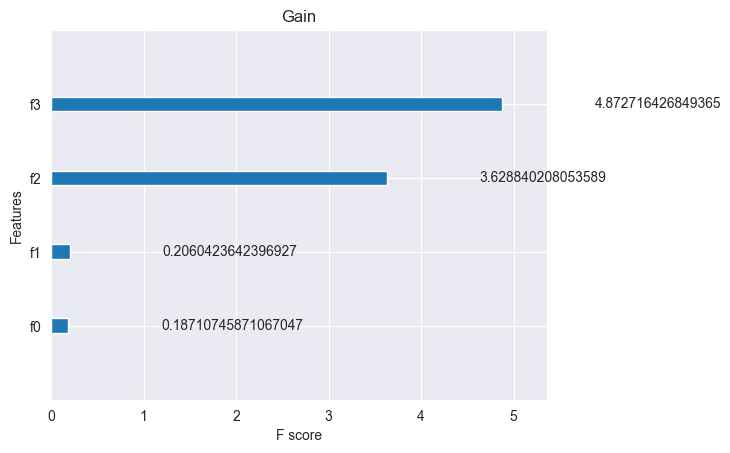

In [17]:
plot_importance(model, importance_type='gain', title='Gain')

**Cover:** The Cover metric means the relative number of observations related to this feature. Therefore is the number of observations for which the leaf node is determined by the feature. This number will be calculated for all the features in the dataset and the cover will be expressed as a percentage over all features' cover metrics.

<Axes: title={'center': 'Cover'}, xlabel='F score', ylabel='Features'>

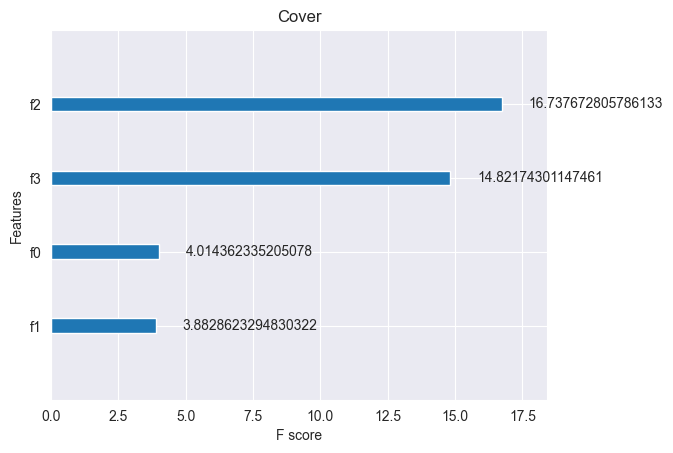

In [18]:
plot_importance(model, importance_type='cover', title='Cover')

**Weight (Frequence):** is the percentage representing the relative number of times a particular feature occurs in the trees of the model. Is the number of splits in which the particular feature occurred.

<Axes: title={'center': 'Weight (Frequence)'}, xlabel='F score', ylabel='Features'>

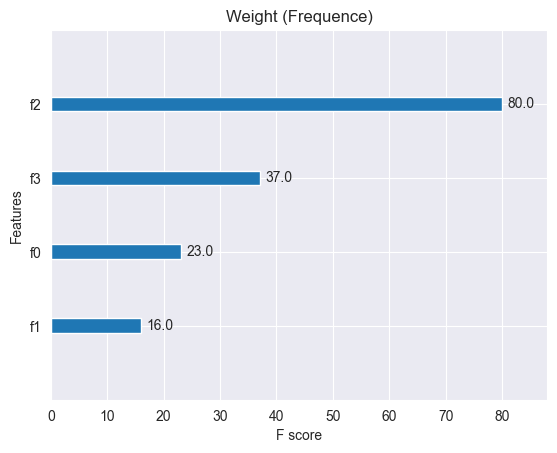

In [19]:
plot_importance(model, importance_type='weight', title='Weight (Frequence)')

In order to avoid overfitting, we can use the early stopping technique looking at the error on our local validation set. Let's try it:

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [21]:
model = xgb.train(params,
                  dtrain,
                  num_round,
                  verbose_eval=2,
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  early_stopping_rounds=20)

[0]	train-merror:0.02083	validation-merror:0.00000
[2]	train-merror:0.02083	validation-merror:0.00000
[4]	train-merror:0.02083	validation-merror:0.00000
[6]	train-merror:0.01042	validation-merror:0.04167
[8]	train-merror:0.01042	validation-merror:0.04167
[10]	train-merror:0.00000	validation-merror:0.08333
[12]	train-merror:0.00000	validation-merror:0.04167
[14]	train-merror:0.00000	validation-merror:0.08333
[16]	train-merror:0.00000	validation-merror:0.08333
[18]	train-merror:0.00000	validation-merror:0.08333
[19]	train-merror:0.00000	validation-merror:0.08333


/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


### If we plot the precision and feature weight we may see changes in the values

In [22]:
preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision: {:.2f} %".format(precision_score(y_test, best_preds, average='macro')))

Precision: 0.92 %


<Axes: title={'center': 'Weight (Frequence)'}, xlabel='F score', ylabel='Features'>

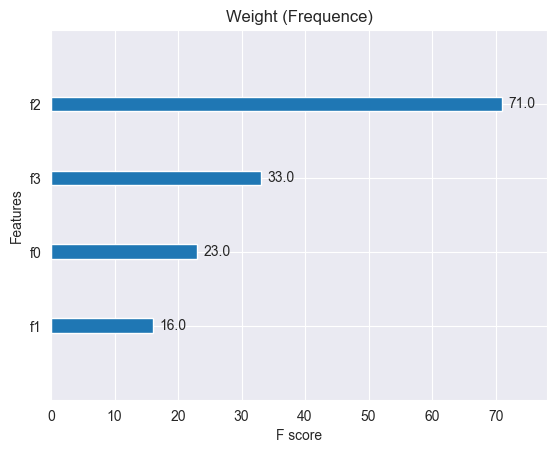

In [23]:
plot_importance(model, importance_type='weight', title='Weight (Frequence)')

## How to use XGBoost in RecSys?

## Hint: reranking and hybridization

### Steps:
* Run your best algorithm and select a number of recommendations higher than the target cutoff, for example if you have to compute MAP@10, get 20 recommendations
* Build a dataframe whose samples are the user-item recommendations
* Add for each interaction some content features: item features, user features
* Add for each interaction some features derived by other algorithms: CBF prediction, hybrid prediction
* Add for each interaction other miscellaneous information: profile length, item popularity ..

## Dummy example

In [4]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Data_manager.Movielens.Movielens10MReader import Movielens10MReader
from bore.data.util import read_train_urm

# data_reader = Movielens10MReader()
# data_loaded = data_reader.load_data()

URM_all = read_train_urm("../data_train.csv")

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.8)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.8)

# ICM_genres = data_loaded.get_loaded_ICM_dict()["ICM_genres"]

In [52]:
ICM_genres

<10681x20 sparse matrix of type '<class 'numpy.float64'>'
	with 21564 stored elements in Compressed Sparse Row format>

### Let's select the recommendations to use to train XGBoost

Several options are possible:
- Take the best recommender and select, say, the top-100 recommended items
- Take multiple recommenders and use the union of their recommendations
- ...

In this example a single model will be used to select the candidate user-item interactions to use for XGBoost

In [9]:
from Recommenders.Recommender_import_list import *

candidate_generator_recommender = ItemKNNCFRecommender(URM_train)
candidate_generator_recommender.fit(topK=969,
            shrink=29,
            similarity="jaccard",
            normalize=True,
            feature_weighting="none")

Similarity column 38121 (100.0%), 4934.49 column/sec. Elapsed time 7.73 sec


## Build the dataframe with the predictions

Creating dataframes can be quite computationally expensive. Never use "append" or iteratively concatenate new elements when you have to run a significant number of iterations, it will take forever. Initialize instead the dimension you want.

In [10]:
import pandas as pd
from tqdm import tqdm
import scipy.sparse as sps
import numpy as np
from xgboost import XGBRanker

n_users, n_items = URM_train.shape

training_dataframe = pd.DataFrame(index=range(0,n_users), columns = ["ItemID"])
training_dataframe.index.name='UserID'

In [11]:
training_dataframe

,ItemID
UserID,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
35731,NaN
35732,NaN
35733,NaN


In [12]:
cutoff = 30

for user_id in tqdm(range(n_users)):    
    recommendations = candidate_generator_recommender.recommend(user_id, cutoff = cutoff)
    training_dataframe.loc[user_id, "ItemID"] = recommendations

100%|██████████| 35736/35736 [00:24<00:00, 1431.25it/s]


In [13]:
training_dataframe

,ItemID
UserID,
0,"[28986, 28958, 18609, 4689, 14888, 14931, 2827..."
1,"[14748, 6348, 3667, 471, 11770, 14931, 2637, 2..."
2,"[22650, 3910, 21361, 2777, 4612, 29964, 16351,..."
3,"[7448, 27392, 9742, 16926, 11362, 25643, 4636,..."
4,"[3058, 14748, 3422, 3468, 15315, 3381, 932, 86..."
...,...
35731,"[37739, 37427, 36567, 38049, 27161, 28332, 362..."
35732,"[36682, 27626, 27783, 37402, 36142, 37317, 365..."
35733,"[37983, 37853, 37958, 37620, 28304, 37344, 379..."


### Let's transform the dataframe so that we have one recommendation per row

In [14]:
training_dataframe = training_dataframe.explode("ItemID")
training_dataframe

,ItemID
UserID,
0,28986
0,28958
0,18609
0,4689
0,14888
...,...
35735,36879
35735,36780
35735,34842


### We should add the target column, which is the correct recommendation as contained in the validation data

In [15]:
URM_validation_coo = sps.coo_matrix(URM_validation)

correct_recommendations = pd.DataFrame({"UserID": URM_validation_coo.row,
                                        "ItemID": URM_validation_coo.col})
correct_recommendations

,UserID,ItemID
0,0,211
1,0,2548
2,0,2635
3,0,2753
4,0,2891
...,...,...
282332,35735,37068
282333,35735,37448
282334,35735,37500
282335,35735,37801


In [16]:
training_dataframe = pd.merge(training_dataframe, correct_recommendations, on=['UserID','ItemID'], how='left', indicator='Exist')
training_dataframe

,UserID,ItemID,Exist
0,0,28986,left_only
1,0,28958,left_only
2,0,18609,left_only
3,0,4689,left_only
4,0,14888,left_only
...,...,...,...
1072075,35735,36879,both
1072076,35735,36780,left_only
1072077,35735,34842,left_only
1072078,35735,36033,left_only


In [17]:
training_dataframe["Label"] = training_dataframe["Exist"] == "both"
training_dataframe.drop(columns = ['Exist'], inplace=True)
training_dataframe

,UserID,ItemID,Label
0,0,28986,False
1,0,28958,False
2,0,18609,False
3,0,4689,False
4,0,14888,False
...,...,...,...
1072075,35735,36879,True
1072076,35735,36780,False
1072077,35735,34842,False
1072078,35735,36033,False


## Now let's add some features. For example, the prediction of other algorithms

This may take some time so it is a good idea to save this data and load it instead of calculating the scores every time.

In [18]:
topPop = TopPop(URM_train)
topPop.fit()

p3alpha = P3alphaRecommender(URM_train)
p3alpha.fit()

slim_elastic = SLIMElasticNetRecommender(urm_train)


# slimbpr = SLIM_BPR_Cython(URM_train)
# slimbpr.fit()


other_algorithms = {
    "TopPop": topPop,
    "P3alpha": p3alpha,
    "SLIMElasticNet": 
    # "SLIM_BPR": slimbpr,
}


P3alphaRecommender: Similarity column 38121 (100.0%), 3632.56 column/sec. Elapsed time 10.49 sec


In [35]:
training_dataframe = training_dataframe.set_index('UserID')

for user_id in tqdm(range(n_users)):  
    for rec_label, rec_instance in other_algorithms.items():
        
        item_list = training_dataframe.loc[user_id, "ItemID"].values.tolist()
        
        all_item_scores = rec_instance._compute_item_score([user_id], items_to_compute = item_list)

        training_dataframe.loc[user_id, rec_label] = all_item_scores[0, item_list] 

training_dataframe = training_dataframe.reset_index()
training_dataframe = training_dataframe.rename(columns = {"index": "UserID"})
training_dataframe

100%|██████████| 69878/69878 [00:28<00:00, 2480.56it/s]


,UserID,ItemID,Label,TopPop,P3alpha
0,0,175,False,18551.0,0.670693
1,0,75,False,12391.0,0.342450
2,0,93,False,17307.0,0.501173
3,0,85,False,16226.0,0.530835
4,0,82,False,13585.0,0.384970
...,...,...,...,...,...
2096335,69877,504,False,6365.0,0.009230
2096336,69877,394,False,7311.0,0.008521
2096337,69877,1079,False,4732.0,0.010761
2096338,69877,22,False,18539.0,0.119266


## The popularity of the item, the user activity etc..

In [36]:
item_popularity = np.ediff1d(sps.csc_matrix(URM_train).indptr)

training_dataframe['item_popularity'] = item_popularity[training_dataframe["ItemID"].values.astype(int)]
training_dataframe

,UserID,ItemID,Label,TopPop,P3alpha,item_popularity
0,0,175,False,18551.0,0.670693,18551
1,0,75,False,12391.0,0.342450,12391
2,0,93,False,17307.0,0.501173,17307
3,0,85,False,16226.0,0.530835,16226
4,0,82,False,13585.0,0.384970,13585
...,...,...,...,...,...,...
2096335,69877,504,False,6365.0,0.009230,6365
2096336,69877,394,False,7311.0,0.008521,7311
2096337,69877,1079,False,4732.0,0.010761,4732
2096338,69877,22,False,18539.0,0.119266,18539


## Or the profile length

In [37]:
user_popularity = np.ediff1d(sps.csr_matrix(URM_train).indptr)

training_dataframe['user_profile_len'] = user_popularity[training_dataframe["UserID"].values.astype(int)]
training_dataframe

,UserID,ItemID,Label,TopPop,P3alpha,item_popularity,user_profile_len
0,0,175,False,18551.0,0.670693,18551,20
1,0,75,False,12391.0,0.342450,12391,20
2,0,93,False,17307.0,0.501173,17307,20
3,0,85,False,16226.0,0.530835,16226,20
4,0,82,False,13585.0,0.384970,13585,20
...,...,...,...,...,...,...,...
2096335,69877,504,False,6365.0,0.009230,6365,33
2096336,69877,394,False,7311.0,0.008521,7311,33
2096337,69877,1079,False,4732.0,0.010761,4732,33
2096338,69877,22,False,18539.0,0.119266,18539,33


## The same can be done with item features

It is better in this case to first create a sparse matrix replicating the rows needed and ten transform it into a sparse dataframe

**WARNING** dataframes are not sparse structures and this may cause the memory requirements to explode

In [38]:
features_df = pd.DataFrame.sparse.from_spmatrix(ICM_genres)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,1.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1.0,1.0,0,1.0,0,0,1.0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,0,0,0,0,0,1.0,1.0,0,1.0,0,0,0,0,0,0,0,0,0,0
10677,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0
10678,0,0,0,0,0,0,1.0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,0
10679,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
training_dataframe = training_dataframe.set_index('ItemID').join(features_df, how='inner')
training_dataframe = training_dataframe.reset_index()
training_dataframe = training_dataframe.rename(columns = {"index": "ItemID"})
training_dataframe

,ItemID,UserID,Label,TopPop,P3alpha,item_popularity,user_profile_len,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,175,0,False,18551.0,0.670693,18551,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75,0,False,12391.0,0.342450,12391,20,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,93,0,False,17307.0,0.501173,17307,20,0,0,0,...,0,0,1.0,0,0,0,0,0,0,0
3,85,0,False,16226.0,0.530835,16226,20,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82,0,False,13585.0,0.384970,13585,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096335,504,69877,False,6365.0,0.009230,6365,33,1.0,0,0,...,0,0,1.0,0,0,0,0,0,0,0
2096336,394,69877,False,7311.0,0.008521,7311,33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2096337,1079,69877,False,4732.0,0.010761,4732,33,1.0,0,0,...,0,0,1.0,0,0,0,0,0,0,0
2096338,22,69877,False,18539.0,0.119266,18539,33,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0


## Then you can train XGBoost to rerank those prediction using as lable whether they should be recommended or not

In [40]:
training_dataframe = training_dataframe.sort_values("UserID").reset_index()
training_dataframe.drop(columns = ['index'], inplace=True)
training_dataframe

,ItemID,UserID,Label,TopPop,P3alpha,item_popularity,user_profile_len,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,175,0,False,18551.0,0.670693,18551,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,0,False,7782.0,0.132384,7782,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,0,False,6305.0,0.123403,6305,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1298,0,False,4910.0,0.056355,4910,20,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1418,0,False,9069.0,0.270038,9069,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096335,196,69877,False,10125.0,0.000000,10125,33,1.0,0,0,...,0,0,1.0,0,0,0,0,0,0,0
2096336,40,69877,False,5309.0,0.005112,5309,33,1.0,0,0,...,1.0,0,1.0,0,0,0,0,0,0,0
2096337,22,69877,False,18539.0,0.119266,18539,33,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
2096338,404,69877,False,10230.0,0.041720,10230,33,0,0,0,...,1.0,0,1.0,0,0,0,0,0,0,0


### To use the ranker one first needs to specify the size of the groups, a group is the dimension you rank on, in this case each group corresponds to a user. Since we have generated a fixed number of candidates for each user (30) all groups have the same length.

In [41]:
groups = training_dataframe.groupby("UserID").size().values
groups

array([30, 30, 30, ..., 30, 30, 30])

In [42]:
from xgboost import XGBRanker

In [43]:
n_estimators = 50
learning_rate = 1e-1
reg_alpha = 1e-1
reg_lambda = 1e-1
max_depth = 5
max_leaves = 0
grow_policy = "depthwise"
objective = "pairwise"
booster = "gbtree"
use_user_profile = False
random_seed = None

XGB_model = XGBRanker(objective='rank:{}'.format(objective),
                      n_estimators = int(n_estimators),
                      random_state = random_seed,
                      learning_rate = learning_rate,
                      reg_alpha = reg_alpha,
                      reg_lambda = reg_lambda,
                      max_depth = int(max_depth),
                      max_leaves = int(max_leaves),
                      grow_policy = grow_policy,
                      verbosity = 0, # 2 if self.verbose else 0,
                      booster = booster,
                      )

In [44]:
y_train = training_dataframe["Label"]
X_train = training_dataframe.drop(columns=["Label"])

XGB_model.fit(X_train,
          y_train,
          group=groups,
          verbose=True)

/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
          device=None, early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None,
          grow_policy='depthwise', importance_type=None,
          interaction_constraints=None, learning_rate=0.1, max_bin=None,
          max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
          max_depth=5, max_leaves=0, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=50,
          n_jobs=None, num_parallel_tree=None, objective='rank:pairwise', ...)

### Once the model is trained we can use it to compute predictions. Each prediction will refer to a specific user-item pair, which we will ten need to rank as we do in any other recommender model.

### Important: In order to use this model to predict the score of new datapoints (i.e., new recommendations) we have to repeat the same data processing steps but:
- We do not need a train-label split, we can user all the data we have to compute the predictions and the features
- The recommendation models used to generate the scores should be trained on all the available data

In [45]:
# Let's say I want to compute the prediction for a group of user-item pairs, for simplicity I will use a slice of the data used
# for training because it already contains all the features
X_to_predict = X_train[X_train["UserID"] == 10]

XGB_model.predict(X_to_predict)

/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


array([-3.8608643e-01,  6.9395639e-02, -1.6918167e-01, -2.7332807e-01,
       -1.5185253e-01, -1.8909879e-01, -2.1977295e-01, -2.5760621e-01,
       -1.9161806e-01, -2.6663002e-01,  6.4773589e-02, -2.2506680e-01,
       -1.4478910e-01, -4.1407189e-01, -3.7606907e-01,  6.8053223e-02,
       -5.6496073e-02,  2.0304276e-01,  2.2145603e-02,  9.9702165e-02,
       -2.0946671e-01,  4.8261501e-02,  7.4107260e-02,  1.2287321e-02,
        1.3306091e-04, -1.3262281e-01, -2.1298264e-01,  9.3900114e-02,
       -7.0334040e-02, -6.7610167e-02], dtype=float32)

### We can have a look to the feature importance to assess which are the most informative ones

<Axes: title={'center': 'Weight (Frequence)'}, xlabel='F score', ylabel='Features'>

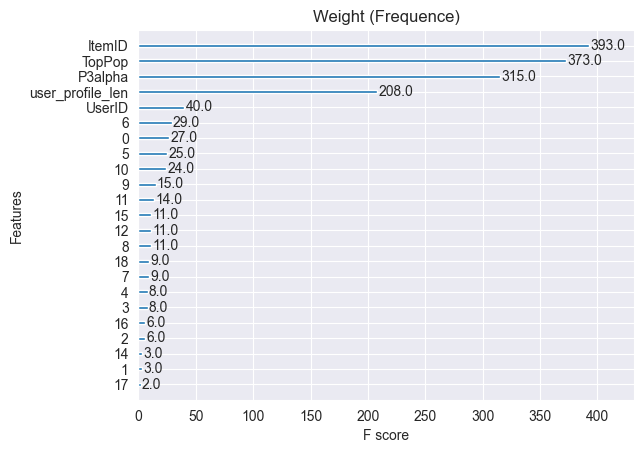

In [46]:
plot_importance(XGB_model, importance_type='weight', title='Weight (Frequence)')

### Note, here ItemID and UserID are provided as integers, meaning that XGBoost will use them as any integer number and may split user groups according to whether their ID is < or > of a certain value. This makes no sense of course because the IDs are not ordinal, they are categorical and the specific numerical value of an IDs has no relation with the semantics of the problem. 

How to address this? 
- Use one-hot-encoded values -> drawback, the number of columns becomes very large
- Use the native "Categorical" data type -> drawback, it is still experimental and may not work very well
- Use another representation of the IDs, such as target encoding -> drawback, some further processing is needed and no teaching material is provided on this

In [47]:
X_train["UserID"] = X_train["UserID"].astype("category")
X_train["ItemID"] = X_train["ItemID"].astype("category")

In [48]:
XGB_model = XGBRanker(objective='rank:{}'.format(objective),
                      n_estimators = int(n_estimators),
                      random_state = random_seed,
                      learning_rate = learning_rate,
                      reg_alpha = reg_alpha,
                      reg_lambda = reg_lambda,
                      max_depth = int(max_depth),
                      max_leaves = int(max_leaves),
                      grow_policy = grow_policy,
                      verbosity = 0, # 2 if self.verbose else 0,
                      booster = booster,
                      enable_categorical = True,
                      tree_method = "hist",  # Supported tree methods are `gpu_hist`, `approx`, and `hist`.
                      )

XGB_model.fit(X_train,
          y_train,
          group=groups,
          verbose=True)

/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
          device=None, early_stopping_rounds=None, enable_categorical=True,
          eval_metric=None, feature_types=None, gamma=None,
          grow_policy='depthwise', importance_type=None,
          interaction_constraints=None, learning_rate=0.1, max_bin=None,
          max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
          max_depth=5, max_leaves=0, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=50,
          n_jobs=None, num_parallel_tree=None, objective='rank:pairwise', ...)

In [49]:
X_to_predict = X_train[X_train["UserID"] == 10]

XGB_model.predict(X_to_predict)

/Users/maxim/studium_repos/BoreBookRecommendations/venv/lib/python3.9/site-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


array([-0.21865636, -0.01731317, -0.02699152, -0.10208133, -0.04586919,
       -0.10208133, -0.09032204, -0.02692658, -0.04365299,  0.21077704,
        0.05632013, -0.09032204, -0.03189369, -0.1875743 , -0.33273128,
        0.06848317, -0.00955517,  0.16128924,  0.04522811,  0.0600001 ,
       -0.03875082,  0.0600001 ,  0.04135324,  0.00220413, -0.01731317,
       -0.02221534, -0.03875082,  0.05701372, -0.00980873,  0.0020105 ],
      dtype=float32)

<Axes: title={'center': 'Weight (Frequence)'}, xlabel='F score', ylabel='Features'>

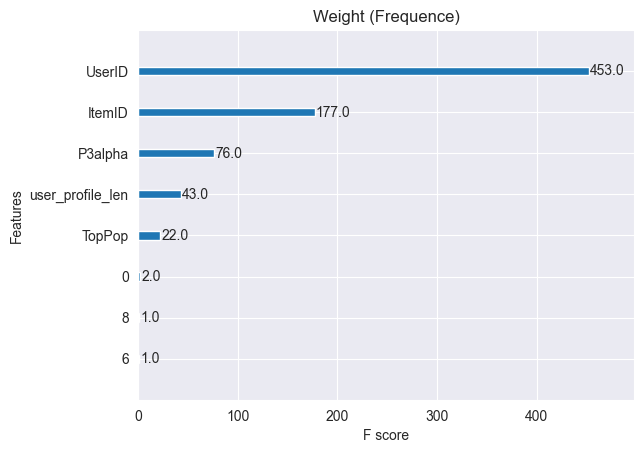

In [50]:
plot_importance(XGB_model, importance_type='weight', title='Weight (Frequence)')

### How to perform hyperparameter tuning?
The issue with this method is that you need a label which should be an item the user has not interacted with but that is a correct recommendation. In practice the idea is:
- Split the data in the usual training-validation-test
- Split the training data in two: one part you use to train the recommenders and another you use as the hidden Label to train XGBoost
- Evaluate your predictions on the validation data as you did for any other recommender model. Use this to select the optimal hyperparameters.
- Given the selected hyperparameters, train the recommender models on all the available data and use all the available data to compute the features used by XGBoost.

Challenge: Since the label we use for training XGBoost is the split of a split, it may happen that the actual correct recommendations are very few. This will result in a problem that is very unbalanced towards zero and will make the training difficult and the evaluation noisy. To mitigate this you may use k-fold cross validation and define the valdation result of a certain hyperparameter configuration as the average obtained with k different training-label splits.